In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
# reading the data
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# bmi is the body mass index 
# 18.5 to 25 = indicates a normal weight 
# Less than 18.5 indicates under-weight 
# Over 30 indicates obese

In [8]:
# shape size of the data
df.shape

(1338, 7)

In [9]:
df.bmi.mean()

30.663396860986538

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [12]:
df.get_dtype_counts()

float64    2
int64      2
object     3
dtype: int64

In [13]:
list(df.select_dtypes(include=object))

['sex', 'smoker', 'region']

In [14]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [15]:
for col in df[['sex', 'smoker', 'region']]:
    print(col, "\n", df[col].value_counts(), "\n","\n", \
          df[col].value_counts(normalize=True).mul(100), "\n")

sex 
 male      676
female    662
Name: sex, dtype: int64 
 
 male      50.523169
female    49.476831
Name: sex, dtype: float64 

smoker 
 no     1064
yes     274
Name: smoker, dtype: int64 
 
 no     79.521674
yes    20.478326
Name: smoker, dtype: float64 

region 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 
 
 southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64 



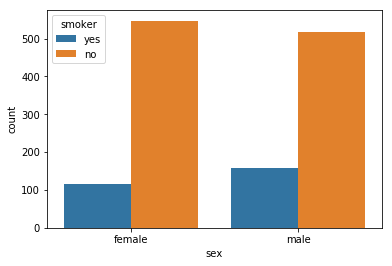

In [16]:
sns.countplot('sex', hue='smoker', data=df);

In [17]:
#sns.countplot('region', hue='sex', data=df);

In [18]:
dummies = pd.get_dummies(df[['sex','smoker', 'region']])

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df = pd.concat([df, dummies], axis=1)

In [21]:
df = df.drop(df[['sex', 'smoker', 'region']], axis=1)

In [22]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [23]:
df.get_dtype_counts()

int64      2
float64    2
uint8      8
dtype: int64

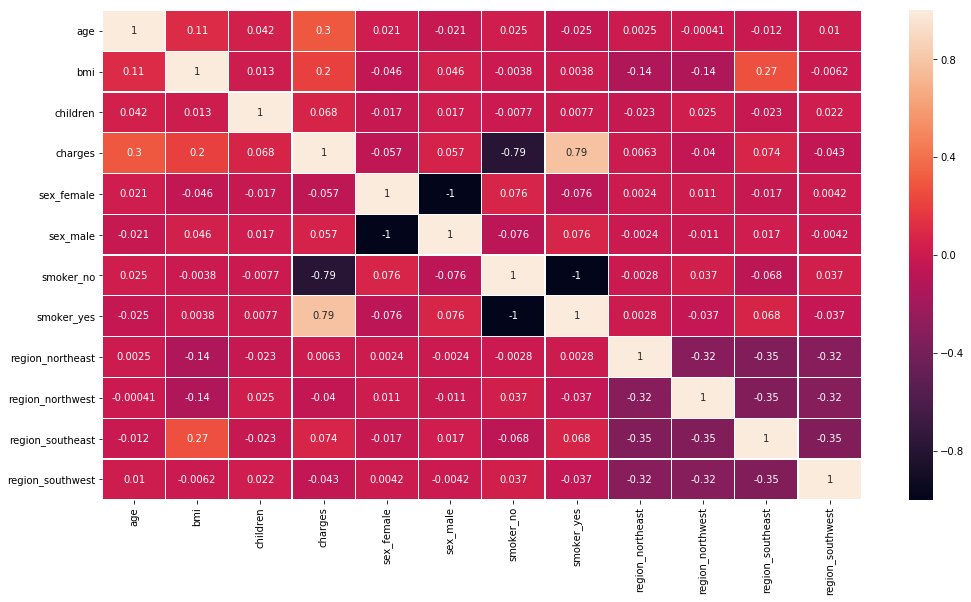

In [24]:
plt.figure(figsize=(17,9))
sns.heatmap(df.corr(), linewidth=0.2, annot=True);

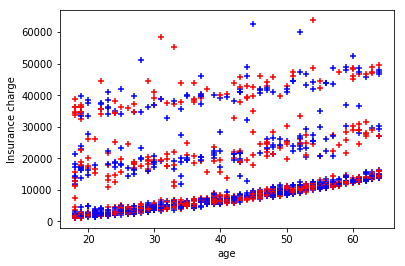

In [25]:
# I'll be evaluationg age vs charges for life insurance
plt.scatter(df.age, df.charges, marker='+',color=['blue', 'red'])
plt.xlabel("age")
plt.ylabel("Insurance charge");
# now as we can see clearly charges seems to increase as you're getting older
# and also we could tell the younger you are, the less likely to get high charges

In [26]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

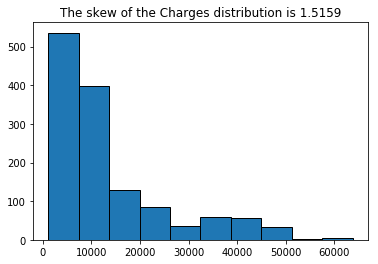

In [27]:
df.charges.hist(grid=False, edgecolor='#000000')
plt.title('The skew of the Charges distribution is {:.4f}'.format(df.charges.skew()));


# What do you think of the skew in your target variable?
# High skewed clearly has clustred the left and tail to the right.

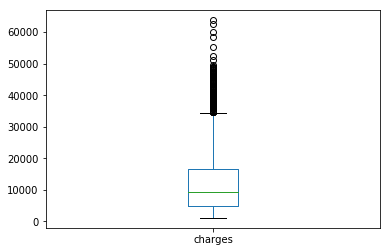

In [28]:
df.charges.plot(kind='box');

In [29]:
# perform a log transform of the same data to reduce skewness. 
charges_transformed = np.log10(df.charges)

In [30]:
charges_transformed.skew()

-0.09009752473025416

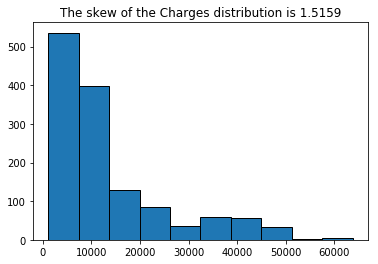

In [31]:
df.charges.hist(grid=False, edgecolor='#000000')
plt.title('The skew of the Charges distribution is {:.4f}'.format(df.charges.skew()));

In [32]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

### Modeling

In [33]:
X = df.drop(columns=['charges'])
y = df['charges']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 11) (402, 11) (936,) (402,)


In [36]:
# create our_model
our_model = LinearRegression()
our_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# let's predict the charges 
y_pred = our_model.predict(X_test)

In [38]:
mse = metrics.mean_squared_error(y_pred, y_test)
mse

33780509.57479163

In [39]:
np.sqrt(mse)

5812.10027225887

In [40]:
our_model.fit(df[['age','sex_female']],df.charges)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# my independent variables r age and sex, and my target's charges
our_model.coef_

array([  258.86510991, -1538.83140564])

In [42]:
our_model.intercept_

3882.456338155802

In [43]:
# predict pepole who are 18 and female and smokers 
our_model.predict([[18,1]])

array([7003.19691092])

In [44]:
# that's how we got our prediction 
#274.926*18+(-81.82)*1+23847.62*1+-2351.735

In [45]:
our_model.fit(df[['age','sex_male']],df.charges)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
our_model.coef_

array([ 258.86510991, 1538.83140564])

In [47]:
our_model.intercept_

2343.624932520237

In [48]:
our_model.predict([[18,1]])

array([8542.02831656])

In [49]:
# Now we know that male who are 18, their insurance charge is 8542.028
# Now we know that female who are 18, their insurance charge is 7003.19

In [50]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [51]:
our_model.fit(df[['region_northeast','region_northwest','region_southeast','region_southwest']],df.charges)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
our_model.coef_

array([-5.14892005e+16, -5.14892005e+16, -5.14892005e+16, -5.14892005e+16])

In [53]:
our_model.intercept_

5.148920051656636e+16

In [54]:
# charges for region_northeast
our_model.predict([[1,0,0,0]])

array([13312.])

In [55]:
# charges for region_northwest
our_model.predict([[0,1,0,0]])

array([12312.])

In [56]:
# charges for region_northwest most likely will charge higher than other regions!
our_model.predict([[0,0,1,0]])

array([14776.])

In [57]:
# region_southwest
our_model.predict([[0,0,0,1]])

array([12496.])

# Predict charges if bmi > 30 and person's a smoker or not!

In [58]:
# create a column called obesity
df["obesity"] = 0

Hypothesis: Are obese people charge higher than those who aren't?

In [59]:
# insert(1) bmi in the obesity column if bmi > 30
df.loc[df['bmi'] > 30, 'obesity'] = 1

In [60]:
# this clearly shows the majority of people will be overweight!
df.obesity.value_counts()

1    705
0    633
Name: obesity, dtype: int64

In [61]:
# make sure of creating the dummy
df.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,obesity
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0


In [81]:
our_model.fit(df[['age','sex_male','smoker_no','obesity']],df.charges)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
our_model.coef_

array([   261.73042668,   -114.30475022, -23861.88507263,   4234.4405439 ])

In [84]:
our_model.intercept_

19810.720241225645

In [85]:
# predict
our_model.predict([[25,1,1,0]])

array([2377.79108527])

In [86]:
our_model.fit(df[['age','sex_male','smoker_yes','obesity']],df.charges)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
our_model.coef_

array([  261.73042668,  -114.30475022, 23861.88507263,  4234.4405439 ])

In [88]:
our_model.intercept_

-4051.1648314026315

In [89]:
# sex_female will be charged less than sex_male with same age
our_model.predict([[25,1,1,1]])

array([30474.11670179])

# 2nd prediction using K-fold cross validation.

In [70]:
from sklearn import model_selection
from sklearn.cross_validation import KFold, cross_val_score

/Users/mohammedalmasoud/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [71]:
# Typically, 5–10 fold cross-validaiton is recommended.
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [72]:
# since there're 3 variables play major factor on my target charges
#cols_not_reg=['age', 'obesity', 'smoker_yes',]


In [73]:
# Note: this code below's cited from notebook!
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 41013534.62018867
R2: 0.7498546688466233

Model 2
MSE: 33395042.28822849
R2: 0.750629251501038

Model 3
MSE: 33015500.47336519
R2: 0.7498700309400055

Model 4
MSE: 46431561.82173395
R2: 0.7502350638981444

Model 5
MSE: 32848429.62159377
R2: 0.7507829233842478

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 37340813.76502202
Mean of R2 for all folds: 0.7502743877140119


In [74]:
from sklearn.model_selection import cross_val_score
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

36962476.53866838
0.7458766396369179


In [75]:
our_model.fit(df[['age','smoker_no','smoker_yes','obesity']],df.charges)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
our_model.coef_

array([   261.82398519, -11925.58413173,  11925.58413173,   4229.12412434])

In [77]:
our_model.intercept_

7817.996642908085

In [78]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,obesity
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,1
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0


In [79]:
# y"charges" =(age_coef*age)+(smoker_no_coef*smoking)+(smoker_yes_coef*smoking)+(obesity_coef*obesity)+avg_intercept
our_model.predict([[28,1,0,1]])

array([7452.60822077])

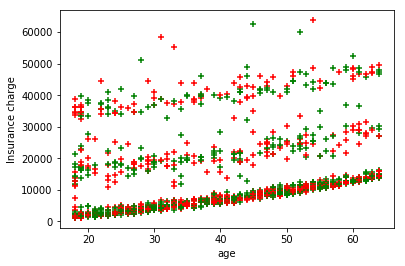

In [80]:
plt.scatter(df.age, df.charges, marker='+',color=['green', 'red'])
plt.xlabel("age")
plt.ylabel("Insurance charge");
